# Programming Lab 2 - Machine Learning Experiment

***
##### CS 434 - Dating Mining and Machine Learning
##### Oregon State University-Cascades
***

In [0]:
name = 'Taylor Mallory'

# Instructions

## Section Code
* Complete the sections below. 

* Make sure to use the current date column as the predictor (`-1`).

* Where appropriate, make sure your code is within the function for the task.

* You may add helper functions (if needed)

* Comment your work: either within the code or as text blocks above.

## Lab Report
* Answer the questions with a thoughtful **paragraph**. You may include graphs, tables, and/or code blocks with `print` as you need.

* Your responses should convey your understanding of the process, your results, and your analysis of those results.

* Answers not placed in the correct section of the Report will not be graded.

* Half-assed answers may receive half a grade.

* Replace the *Lorem ipsum* text with your answers with the Response section.

* *Take pride in visual appeal of your answers.* Format your responses nicely. Review the markup tutorial in `Lecture 00-Getting Started`.


***
# Load packages 
***

Add the packages you need here (not below!)

In [0]:
import enum 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
assert name == 'Taylor Mallory'

***
# Dataset
***

In this Lab, you will build a linear regressive model to predict the number of `Covid19` cases and deaths by country.

In [0]:
cases_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
deaths_url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv'

> These datasets update continuously.

### Some lists of countries

In [0]:
north_america = ['US', 'Canada', 'Mexico']
south_america = ['Brazil', 'Argentina', 'Chile', 'Venezuela']             
europe = ['Spain', 'France', 'Germany', 'United Kingdom']
africa = ['Egypt', 'South Africa', 'Nigeria', 'Kenya']
asia = ['Russia', 'Korea, South', 'Japan', 'India']
# add other lists as you like

***
# Task 1 - Load, clean, and transform data
***

### 1.1 Load data into `df_cases`

In [5]:
# load the dataset into a dataframe
df_cases = pd.read_csv(cases_url)
df_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


### 1.2 Load data into `df_deaths`

In [6]:
# load the dataset into a dataframe
df_deaths = pd.read_csv(deaths_url)
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 1.3 Drop latitude and longitude from both dataframes

In [7]:
# drop latitude and longitude
df_cases.drop('Lat',axis=1, inplace=True)
df_cases.drop('Long',axis=1, inplace=True)
df_deaths.drop('Lat',axis=1, inplace=True)
df_deaths.drop('Long',axis=1, inplace=True)
df_cases

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


### 1.4 Combine regions by country

Combine all states/territories for each country into a single sum for that country. For example, we combine the 11 provinces into one count for `Canada`.

* Use [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) by `'Country/Region'`
* Use the [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function to `'sum'`

In [8]:
# combine regions into same country
df_cases = df_cases.groupby(['Country/Region']).agg("sum")
df_deaths = df_deaths.groupby(['Country/Region']).agg("sum")
df_deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,4,4,4,4
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> This action will reduce the number of rows and eliminate the `'Province/State'` column. 

### 1.5 Display data

In [9]:
# display df_cases
df_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,39,41,44,47,48,52,59,59,59,84,91,98,109,116,119,134,161,194,217,237,254,261,263,263,267,268,290,308,308,374,374,402,418,437,449,466,474,480,484
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
# display deaths
df_deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,4,4,4,4
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Self Check

In [0]:
assert len(df_cases)==185 and len(df_deaths)==185

***
# Task 2 - Explore Data
***

**Note** : this dataset updates daily. When asked to use 'most recent day', use the *last* column in the dataframes.  **Do not hardcode specific dates!**

### 2.1 Describe `df_cases` for today

In [12]:
# describe df_cases most recent day
df_cases.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.00000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,3.000000,3.535135,5.086486,7.751351,11.448649,15.821622,30.151351,33.329730,44.508108,53.659459,65.070270,90.740541,107.464865,129.145946,149.378378,166.454054,185.897297,200.648649,217.027027,231.145946,242.172973,244.437838,326.313514,361.540541,373.135135,384.994595,395.989189,406.140541,408.859459,411.875676,415.237838,424.713514,426.80000,430.059459,434.627027,439.935135,447.275676,454.659459,464.924324,477.670270,...,981.481081,1065.416216,1161.194595,1311.189189,1471.394595,1645.983784,1821.367568,2044.491892,2259.681081,2527.854054,2862.654054,3206.978378,3571.313514,3892.648649,4229.129730,4635.064865,5040.405405,5477.437838,5922.691892,6355.983784,6753.967568,7141.248649,7546.443243,7998.940541,8460.962162,8959.600000,9381.891892,9917.410811,10296.421622,10676.729730,11108.416216,11629.302703,12103.481081,12522.789189,12973.394595,13358.091892,13773.464865,14178.643243,14636.367568,15189.064865
std,40.287688,47.271074,67.633789,103.362557,152.543112,211.504049,405.005232,447.496726,598.504278,720.611914,874.189955,1222.603155,1449.486795,1742.903411,2017.354951,2248.722202,2507.712587,2706.504894,2928.166427,3113.785492,3263.177285,3290.592646,4403.402047,4878.557342,5029.625967,5184.006356,5325.235141,5455.883849,5485.887881,5519.532771,5554.263276,5660.889588,5662.41828,5678.536739,5716.265582,5746.683616,5779.049282,5804.029629,5837.254867,5881.682866,...,6468.917109,6607.885878,6797.006807,7102.780426,7481.990583,7942.622538,8421.241915,9089.272087,9774.794195,10698.401642,11963.827870,13295.590390,14772.177496,16164.852600,17691.710483,19579.131374,21467.116353,23645.707325,25948.255258,28332.014930,30374.761188,32483.285919,34701.766764,37056.396221,39549.712154,42059.988364,44284.845492,46708.985555,48586.491194,50577.623339,52728.121279,55220.711763,57629.525144,59935.332495,62022.844706,63902.685064,65963.941895,68051.310572,70216.697613,72910.907028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

### 2.2 Describe `df_deaths` for today

In [13]:
# describe df_deaths most recent day
df_deaths.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.091892,0.097297,0.140541,0.227027,0.302703,0.443243,0.708108,0.718919,0.924324,1.151351,1.400000,1.956757,2.302703,2.659459,3.048649,3.427027,3.886486,4.356757,4.897297,5.475676,6.016216,6.043243,7.410811,8.232432,9.005405,9.567568,10.097297,10.848649,11.470270,12.145946,12.167568,13.286486,13.345946,14.210811,14.637838,14.972973,15.210811,15.524324,15.897297,16.194595,...,38.518919,42.729730,47.205405,53.335135,61.075676,70.124324,79.194595,89.216216,100.675676,114.491892,129.567568,147.016216,165.686486,183.378378,203.145946,227.610811,255.043243,286.410811,317.783784,349.227027,374.994595,403.054054,442.902703,477.551351,516.329730,554.237838,586.545946,616.756757,645.897297,681.054054,725.345946,777.372973,831.540541,862.210811,892.124324,918.837838,954.497297,989.535135,1031.659459,1064.886486
std,1.249865,1.323386,1.911558,3.087901,4.117202,6.028760,9.631312,9.778354,12.572170,15.660071,19.042059,26.540950,31.246308,36.098713,41.392249,46.538744,52.788061,59.184423,66.536564,74.403357,81.755499,82.123107,100.650136,111.825393,122.265059,129.837386,137.042485,147.261963,155.569153,164.537644,164.536302,179.607540,179.752182,190.778365,195.923881,199.745611,201.878202,205.115796,208.577337,211.160188,...,291.330271,309.879767,335.349689,361.916601,401.208575,453.382398,501.702628,552.051477,612.747228,681.376445,753.054178,840.727076,931.937089,1015.781375,1109.723490,1209.572638,1319.987969,1445.263337,1574.710693,1703.307480,1809.148384,1926.160141,2091.193577,2236.557608,2402.482044,2570.294212,2720.623909,2851.089462,2983.690955,3150.869707,3358.761201,3647.911001,3919.077399,4065.532687,4214.820028,4337.268402,4518.004286,4688.044001,4918.956496,5075.270703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

### 2.3 Function to graph country counts

In [0]:
# for the dataframe, plot a line for each country
def graph_countries(df, country_lst, title):
  for i in country_lst:
    plt.plot(df.loc[i])
  plt.legend([i for i in country_lst])
  plt.title(title)
  plt.show()

Compare different countries

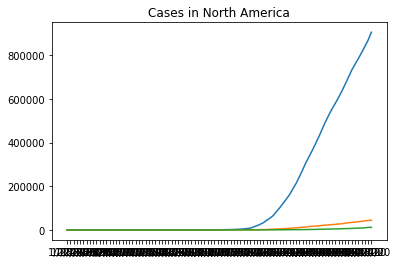

In [15]:
graph_countries(df_cases, north_america, 'Cases in North America')
# graph_countries(df_cases, south_america, 'Cases in South America')
# graph_countries(df_cases, europe, 'Cases in Europe')
# graph_countries(df_cases, africa, 'Cases in Africa')
# graph_countries(df_cases, asia, 'Cases in Asia')

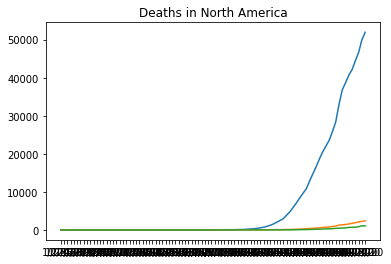

In [16]:
graph_countries(df_deaths, north_america, 'Deaths in North America')
# graph_countries(df_deaths, south_america, 'Deaths in South America')
# graph_countries(df_deaths, europe, 'Deaths in Europe')
# graph_countries(df_deaths, africa, 'Deaths in Africa')
# graph_countries(df_deaths, asia, 'Deaths in Asia')

*** 
# Task 3 - Feature Engineering
*** 

### 3.1 `Log10` transform all numeric columns





We need to lift the value off the zero floor to avoid `-inf` values.
* add `1` to each value before `log10` transform

In [17]:
# log10 transform all int64 columns
t = [[1,2,3],[4,5,6]]
tdf = pd.DataFrame(t)
def log10_transform(df):
  df = np.log10(df.select_dtypes(include='int64').apply(lambda x: x + 1))
  return df

print(log10_transform(tdf))

         0         1         2
0  0.30103  0.477121  0.602060
1  0.69897  0.778151  0.845098


> This function will be called by the experiment below

### 3.2 Drop days 

We want to be able to predict one than one day in advance.  Complete the function to drop `num_days` from the end of the data frame while keeping the last column to use as our predictor.  

For example, given the column series:

$$\texttt{4/14, 4/15, 4/16, 4/17, 4/18, 4/19, 4/20}$$

`drop_days(df_cases, 3)` would return a dataframe with columns:

$$\texttt{4/14, 4/15, 4/16, 4/20}$$

having dropped $\texttt{4/17, 4/18, 4/19}$, the last `num_days=3` columns that are not the last column.

> `num_days=0` means no columns are dropped.  It is means predict tomorrow.

In [0]:
t = [[1,2,3,4,5,6,7],[4,5,6,7,8,9,10]]
tdf = pd.DataFrame(t)

In [0]:
# drop the num_days, return the df
def drop_days(df, num_days):
  df = df.drop(df.columns[-1-num_days:-1], axis=1)
  return df

In [20]:
print(tdf)
print(' ')
print(drop_days(tdf, 2))
print(' ')
print(drop_days(tdf, 0))

   0  1  2  3  4  5   6
0  1  2  3  4  5  6   7
1  4  5  6  7  8  9  10
 
   0  1  2  3   6
0  1  2  3  4   7
1  4  5  6  7  10
 
   0  1  2  3  4  5   6
0  1  2  3  4  5  6   7
1  4  5  6  7  8  9  10


> This function will be called by the experiment below

*** 
# Task 4 - Train a `LinearRegression` model
*** 

### 4.1 Train/Test split and partition

Complete this function that takes in a list of countries and a dataframe and partitions into `X_train, y_train, X_test, y_test`.
* `test_lst` represents the countries to put in the test set
* all other countries comprise the train set
* no country should appear in both train and test set
* `df` represents the dataframe to partition

In [0]:
# for the given dataframe split into train and test
def train_test_split(df, test_lst):
  df_test = pd.DataFrame()
  if(len(test_lst) < 2):
      raise Exception('Too few countries')
  for i in test_lst:
    df_test[i] = df.loc[i]
  df = df.drop(test_lst)
  df_test = df_test.transpose()
  X_train, y_train, X_test, y_test = df.iloc[:, :-1].values, df.iloc[:, -1].values, df_test.iloc[:, :-1].values, df_test.iloc[:, -1].values
  return X_train, y_train, X_test, y_test

In [32]:
X_train, y_train, X_test, y_test = train_test_split(df_cases, north_america)
print(X_train, y_train, X_test, y_test)

[[   0    0    0 ... 1092 1176 1279]
 [   0    0    0 ...  609  634  663]
 [   0    0    0 ... 2811 2910 3007]
 ...
 [   0    0    0 ...    1    1    1]
 [   0    0    0 ...   70   74   76]
 [   0    0    0 ...   28   28   28]] [  1351    678   3127    731     25     24   3607   1596   6677  15071
   1592     73   2518   4689     77   8773  44293     18     54      7
    807   1421     22  54043    138   1234    629    144     11     88
    122   1430     16     40  12306  83899   4881    200    394    687
   1077   2009   1285    804   7273   8408    712    999     16   5749
  22719   4092    274    214     39   1605     36    117     18   4395
 159952    172     10    444 154999   1279   2490     15    430    954
     52     73     72      9    591   2443   1789  24530   8211  88194
   1708  18184  15058 192994    288  12829    441   2482    336  10718
    510   2614    665     19    784    696    117     61     81   1410
   3695      9    122     33   5691    129    325    447      

> The `test_lst` needs to contain at least two countries for things to work.

### 4.2 Train and test a model

Complete the function that trains a regressor and predicts the test set.

Model: [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) linear regressor with regularization
* `alpha=1.0`
* `random_state=1`

In [0]:
# train and predict a Ridge classifier
def predict(X_train, y_train, X_test, y_test):
  clf = Ridge(alpha=1.0, random_state=1)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return clf, y_pred

*** 
# Task 5 - Explore Results
*** 

There is no code to write in this section.  Run the code blocks. 

You should edit the string list of countries in the final block to explore different results. 

### 5.1 Train and test pipeline

This provided function runs the entire experiment:
1. Drop days
2. Log transform
3. Trains model
4. Tests model
5. Analyzes results
6. Examines predictions

In [0]:
# predict deaths
def train_and_test(df, country_lst=['US'], num_days=0, verbose=True):

  miscounts = []

  

  df1 = drop_days(df.copy(), num_days)



  # log transforms

  df1 = log10_transform(df1)



  # train and predict

  X_train, y_train, X_test, y_test = train_test_split(df1, country_lst)  

  clf, y_pred = predict(X_train, y_train, X_test, y_test)



  # data statistics

  if verbose:

    print('Date\t{0}'.format(df1.columns[-1]))

    print('Window\t{0} days'.format(num_days))

    print('Train\t{0} {1}'.format(X_train.shape, y_train.shape)) 

    print('Test\t{0} {1} {2}'.format(X_test.shape, y_test.shape, y_pred.shape))

    print()



  # analyze results

  if verbose:

    print('R^2\t{:f}'.format(clf.score(X_test, y_test)))

    print('MAE\t{:f}'.format(mean_absolute_error(y_test, y_pred)))

    print('MSE\t{:f}'.format(mean_squared_error(y_test, y_pred)))  

    print('r\t{:f}'.format(pearsonr(y_test, y_pred)[0]))

    print()



  # prediction error for each country

  for country in country_lst:

    idx = country_lst.index(country)

    miscount = int(round((10**y_test[idx]-1) - (10**y_pred[idx]-1)))

    miscounts.append(miscount)

    if verbose: print('{:<15} {:s} by {:d} people'.format(country, ' over' if miscount < 0 else 'under', abs(miscount))) 



  # graph true vs predicted

  if verbose: 

    print()  

    x = y_test

    y = y_pred

    plt.figure()

    plt.scatter(x, y, color='blue',s=100)

    plt.xlabel('True')

    plt.ylabel('Predicted')

    plt.title('Results')

    m, b = np.polyfit(x, y, 1)

    plt.plot(x, m*x + b, color='red', linewidth=2)  

    plt.show()



  # return miscount  

  return miscounts


> You should not change anything in the above function

### 5.2 Run the experiment

In [0]:
# run experiment for both cases and deaths
def experiment(country_lst, num_days):
  # cases
  print(('='*14) + '\n    CASES\n' + ('='*14))
  train_and_test(df_cases, country_lst, num_days)

  # deaths
  print(('='*14) + '\n    DEATHS\n' + ('='*14))
  train_and_test(df_deaths, country_lst, num_days)  

> You should not change anything in the above function

    CASES
Date	4/24/20
Window	0 days
Train	(182, 93) (182,)
Test	(3, 93) (3,) (3,)

R^2	0.999816
MAE	0.009381
MSE	0.000115
r	0.999931

US              under by 8573 people
Canada           over by 769 people
Mexico          under by 434 people



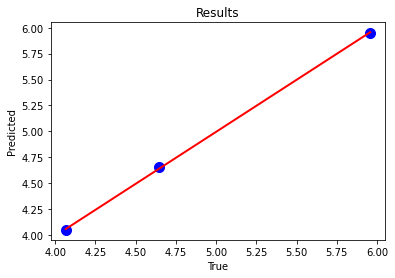

    DEATHS
Date	4/24/20
Window	0 days
Train	(182, 93) (182,)
Test	(3, 93) (3,) (3,)

R^2	0.999665
MAE	0.011112
MSE	0.000177
r	0.999984

US               over by 654 people
Canada          under by 35 people
Mexico          under by 51 people



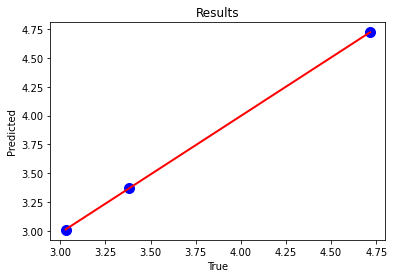

In [25]:
# countries to test
country_lst = north_america            # <== CHANGE ME!!

# number of days to drop
num_days = 0

# run experiment
experiment(country_lst, num_days)


*** 
# Task 6 - Assessing predictive look ahead
*** 

In this section, you will choose a short list of countries and graph the number of mispredictions for both `cases` and `deaths` as a function of the predictive window. 

### 6.1 Function to graph predictive lookahead over time

1. Select a list of countries (your choice)
2. For each day `d` in `[0..13]` of predictive window (2 weeks)
  * `train_and_test` with each country `c` with `d` days removed
  * save the miscounts
3. Graph the miscounts (x_axis=days vs y_axis=person count)
  * reverse the `x_axis`
    * `0` days is the last (right-most) date
    * `13` is the first (left-most) date
  * place countries on the same graph
  * place `cases` and `deaths` on separate graphs
4. Beautify your graphs
  * label graph title and axes
  * include a legend
  * customize colors as you like


> Put your work in the function below so we can call it (again) in the `Report` section. You can add helper functions as needed.

In [0]:
def predict_ahead(country_lst, df_cases, df_deaths):
  miscount_cases = []
  miscount_deaths = []
  print(('='*14) + '\n    CASES\n' + ('='*14))
  for i in range(0,14):
    miscount_cases.append(train_and_test(df_cases, country_lst, i))

  print(('='*14) + '\n    DEATHS\n' + ('='*14))
  for i in range(0,14):
    miscount_deaths.append(train_and_test(df_deaths, country_lst, i))

  print(('='*14) + '\n    MISCOUNT CASES\n' + ('='*14))
  print(country_lst)
  for i in range(len(miscount_cases)):
    print(miscount_cases[i])

  plt.plot([i for i in miscount_cases])
  plt.legend([i for i in country_lst])
  plt.title('Miscount Cases')
  plt.xlabel('days')
  plt.ylabel('cases')
  plt.show()

  print(('='*14) + '\n    MISCOUNT DEATHS\n' + ('='*14))
  print(country_lst)
  for i in range(len(miscount_deaths)):
    print(miscount_deaths[i])

  plt.plot([i for i in miscount_deaths])
  plt.legend([i for i in country_lst])
  plt.title('Miscount Deaths')
  plt.xlabel('days')
  plt.ylabel('deaths')
  plt.show()


### 6.2 Test your predictive lookahead

    CASES
Date	4/24/20
Window	0 days
Train	(183, 93) (183,)
Test	(2, 93) (2,) (2,)

R^2	-8.134776
MAE	0.020562
MSE	0.000426
r	1.000000

France           over by 8465 people
Germany          over by 6830 people



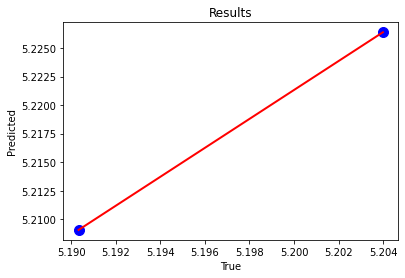

Date	4/24/20
Window	1 days
Train	(183, 92) (183,)
Test	(2, 92) (2,) (2,)

R^2	-15.861002
MAE	0.027530
MSE	0.000787
r	1.000000

France           over by 12585 people
Germany          over by 8117 people



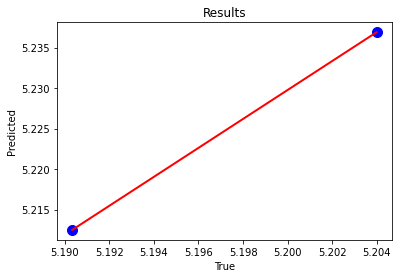

Date	4/24/20
Window	2 days
Train	(183, 91) (183,)
Test	(2, 91) (2,) (2,)

R^2	-31.283767
MAE	0.037273
MSE	0.001506
r	1.000000

France           over by 18728 people
Germany          over by 9737 people



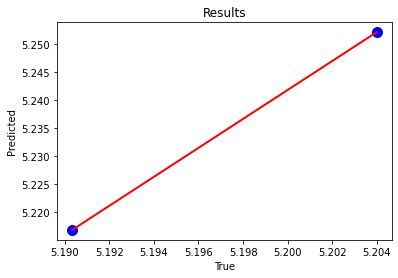

Date	4/24/20
Window	3 days
Train	(183, 90) (183,)
Test	(2, 90) (2,) (2,)

R^2	-47.765536
MAE	0.045747
MSE	0.002275
r	1.000000

France           over by 23380 people
Germany          over by 11946 people



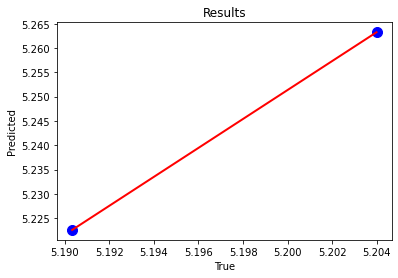

Date	4/24/20
Window	4 days
Train	(183, 89) (183,)
Test	(2, 89) (2,) (2,)

R^2	-69.286874
MAE	0.054861
MSE	0.003279
r	1.000000

France           over by 28528 people
Germany          over by 14347 people



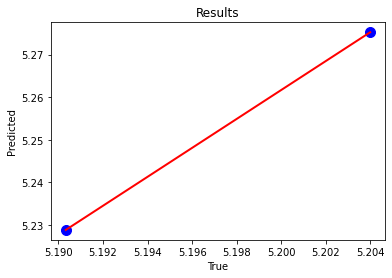

Date	4/24/20
Window	5 days
Train	(183, 88) (183,)
Test	(2, 88) (2,) (2,)

R^2	-93.435801
MAE	0.064041
MSE	0.004406
r	1.000000

France           over by 33015 people
Germany          over by 17553 people



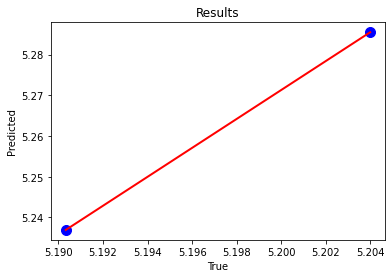

Date	4/24/20
Window	6 days
Train	(183, 87) (183,)
Test	(2, 87) (2,) (2,)

R^2	-130.722449
MAE	0.074849
MSE	0.006145
r	1.000000

France           over by 40560 people
Germany          over by 19534 people



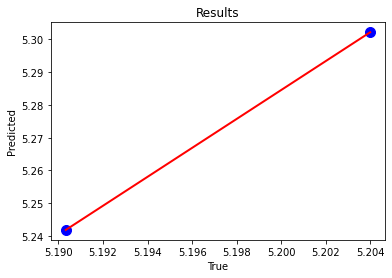

Date	4/24/20
Window	7 days
Train	(183, 86) (183,)
Test	(2, 86) (2,) (2,)

R^2	-153.960878
MAE	0.080338
MSE	0.007229
r	1.000000

France           over by 45246 people
Germany          over by 19914 people



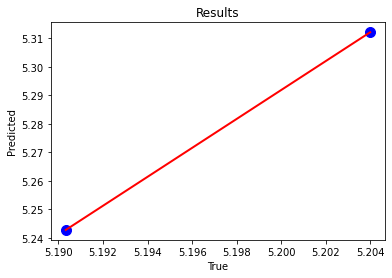

Date	4/24/20
Window	8 days
Train	(183, 85) (183,)
Test	(2, 85) (2,) (2,)

R^2	-116.355810
MAE	0.072457
MSE	0.005475
r	1.000000

France           over by 35684 people
Germany          over by 21924 people



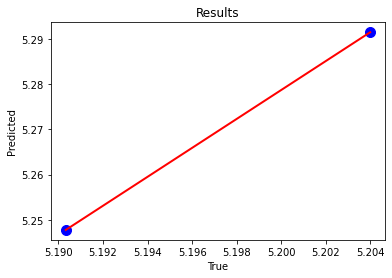

Date	4/24/20
Window	9 days
Train	(183, 84) (183,)
Test	(2, 84) (2,) (2,)

R^2	-74.717843
MAE	0.059434
MSE	0.003533
r	1.000000

France           over by 23604 people
Germany          over by 22591 people



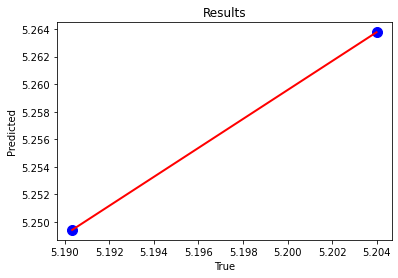

Date	4/24/20
Window	10 days
Train	(183, 83) (183,)
Test	(2, 83) (2,) (2,)

R^2	-61.552100
MAE	0.048417
MSE	0.002918
r	-1.000000

France           over by 9266 people
Germany          over by 28109 people



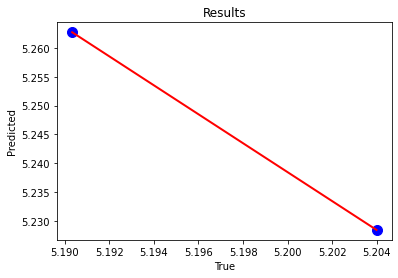

Date	4/24/20
Window	11 days
Train	(183, 82) (183,)
Test	(2, 82) (2,) (2,)

R^2	-84.867609
MAE	0.058480
MSE	0.004006
r	-1.000000

France          under by 12137 people
Germany          over by 32509 people



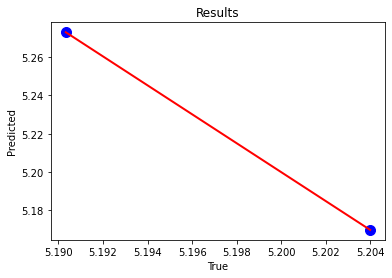

Date	4/24/20
Window	12 days
Train	(183, 81) (183,)
Test	(2, 81) (2,) (2,)

R^2	-217.697851
MAE	0.100881
MSE	0.010203
r	-1.000000

France          under by 34640 people
Germany          over by 38240 people



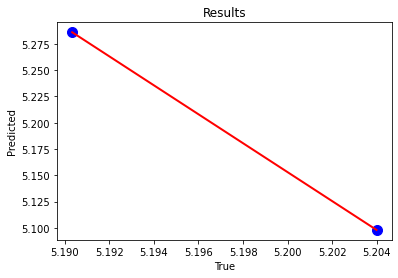

Date	4/24/20
Window	13 days
Train	(183, 80) (183,)
Test	(2, 80) (2,) (2,)

R^2	-251.754582
MAE	0.108588
MSE	0.011792
r	-1.000000

France          under by 35613 people
Germany          over by 43667 people



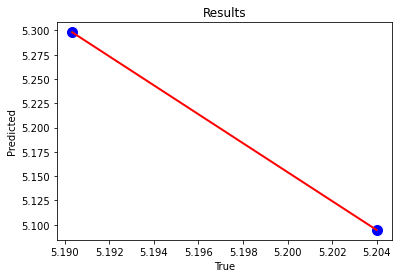

    DEATHS
Date	4/24/20
Window	0 days
Train	(183, 93) (183,)
Test	(2, 93) (2,) (2,)

R^2	0.996731
MAE	0.015420
MSE	0.000282
r	1.000000

France           over by 1161 people
Germany          over by 118 people



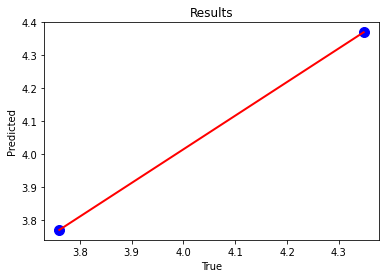

Date	4/24/20
Window	1 days
Train	(183, 92) (183,)
Test	(2, 92) (2,) (2,)

R^2	0.994756
MAE	0.018431
MSE	0.000452
r	1.000000

France           over by 1541 people
Germany          over by 105 people



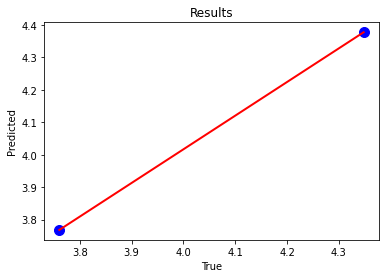

Date	4/24/20
Window	2 days
Train	(183, 91) (183,)
Test	(2, 91) (2,) (2,)

R^2	0.992646
MAE	0.021640
MSE	0.000634
r	1.000000

France           over by 1844 people
Germany          over by 117 people



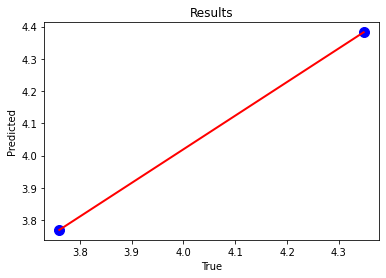

Date	4/24/20
Window	3 days
Train	(183, 90) (183,)
Test	(2, 90) (2,) (2,)

R^2	0.990037
MAE	0.025631
MSE	0.000859
r	1.000000

France           over by 2142 people
Germany          over by 153 people



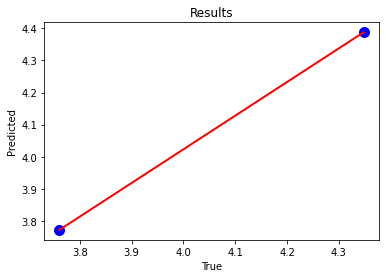

Date	4/24/20
Window	4 days
Train	(183, 89) (183,)
Test	(2, 89) (2,) (2,)

R^2	0.989210
MAE	0.026591
MSE	0.000931
r	1.000000

France           over by 2237 people
Germany          over by 156 people



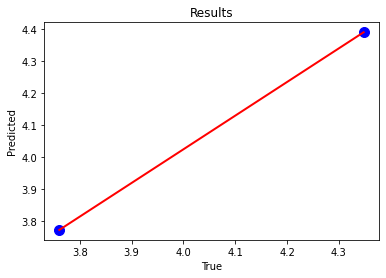

Date	4/24/20
Window	5 days
Train	(183, 88) (183,)
Test	(2, 88) (2,) (2,)

R^2	0.985450
MAE	0.032309
MSE	0.001255
r	1.000000

France           over by 2538 people
Germany          over by 241 people



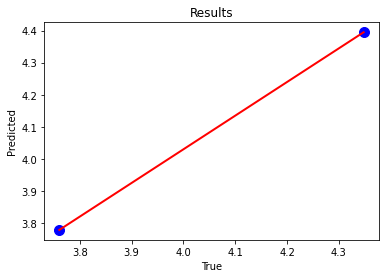

Date	4/24/20
Window	6 days
Train	(183, 87) (183,)
Test	(2, 87) (2,) (2,)

R^2	0.980984
MAE	0.037836
MSE	0.001640
r	1.000000

France           over by 2851 people
Germany          over by 319 people



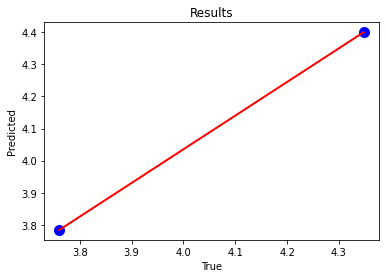

Date	4/24/20
Window	7 days
Train	(183, 86) (183,)
Test	(2, 86) (2,) (2,)

R^2	0.979451
MAE	0.037556
MSE	0.001773
r	1.000000

France           over by 3101 people
Germany          over by 251 people



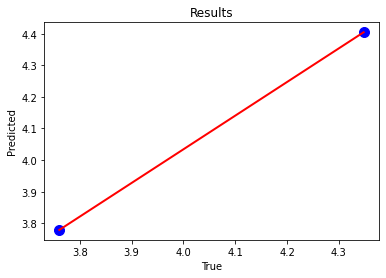

Date	4/24/20
Window	8 days
Train	(183, 85) (183,)
Test	(2, 85) (2,) (2,)

R^2	0.972301
MAE	0.043799
MSE	0.002389
r	1.000000

France           over by 3627 people
Germany          over by 301 people



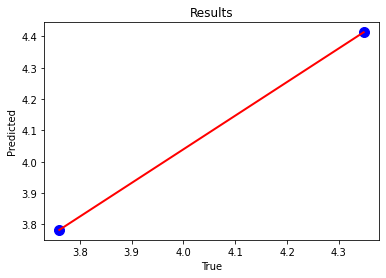

Date	4/24/20
Window	9 days
Train	(183, 84) (183,)
Test	(2, 84) (2,) (2,)

R^2	0.979562
MAE	0.036394
MSE	0.001763
r	1.000000

France           over by 3144 people
Germany          over by 209 people



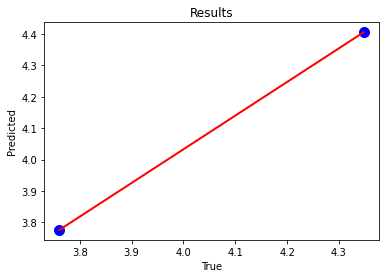

Date	4/24/20
Window	10 days
Train	(183, 83) (183,)
Test	(2, 83) (2,) (2,)

R^2	0.960502
MAE	0.056280
MSE	0.003407
r	1.000000

France           over by 4003 people
Germany          over by 567 people



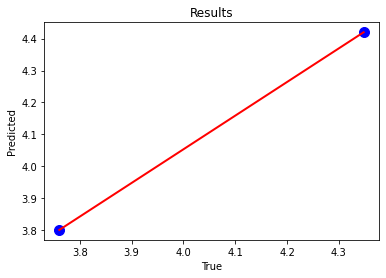

Date	4/24/20
Window	11 days
Train	(183, 82) (183,)
Test	(2, 82) (2,) (2,)

R^2	0.937192
MAE	0.072524
MSE	0.005418
r	1.000000

France           over by 4823 people
Germany          over by 853 people



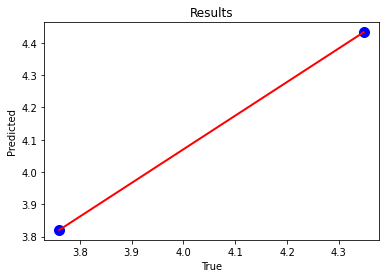

Date	4/24/20
Window	12 days
Train	(183, 81) (183,)
Test	(2, 81) (2,) (2,)

R^2	0.919428
MAE	0.082849
MSE	0.006951
r	1.000000

France           over by 5267 people
Germany          over by 1063 people



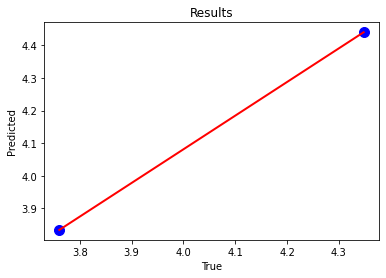

Date	4/24/20
Window	13 days
Train	(183, 80) (183,)
Test	(2, 80) (2,) (2,)

R^2	0.883004
MAE	0.100332
MSE	0.010093
r	1.000000

France           over by 5461 people
Germany          over by 1583 people



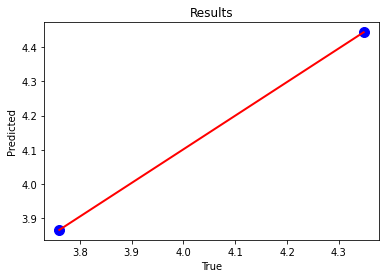

    MISCOUNT CASES
['France', 'Germany']
[-8465, -6830]
[-12585, -8117]
[-18728, -9737]
[-23380, -11946]
[-28528, -14347]
[-33015, -17553]
[-40560, -19534]
[-45246, -19914]
[-35684, -21924]
[-23604, -22591]
[-9266, -28109]
[12137, -32509]
[34640, -38240]
[35613, -43667]


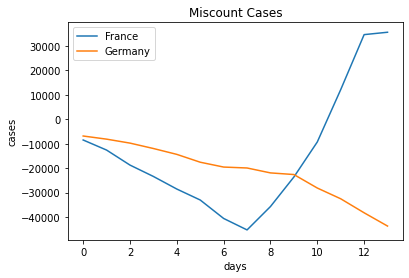

    MISCOUNT DEATHS
['France', 'Germany']
[-1161, -118]
[-1541, -105]
[-1844, -117]
[-2142, -153]
[-2237, -156]
[-2538, -241]
[-2851, -319]
[-3101, -251]
[-3627, -301]
[-3144, -209]
[-4003, -567]
[-4823, -853]
[-5267, -1063]
[-5461, -1583]


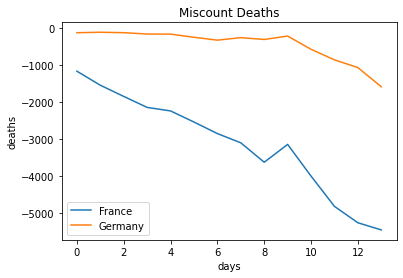

In [95]:
# update to select any 2+ countries of choice
country_lst = ['France','Germany']

# graph your predictive lookahead
predict_ahead(country_lst, df_cases, df_deaths)

# Report

In [0]:
# for grading (values will change)
grading_country_list = ['Austria', 'Australia']
grading_num_days = 0

***
#### Question 1 
Consider your evaluation of the model (e.g., $R^2$, correlation). How did the model do? What conclusions can you draw?
***

##### Response 1

Honestly, I'm not entirely sure. I did some more reading and looked into my code and can't seem to see why my values vary so widely. Some are near 100%, which is great, but others are in the negative, and from what I'm reading that shouldn't be happening. I'm not entirely sure what is going on.

***
#### Question 2
Consider the miscounts for `cases` and `deaths`.  How did did the model do?  What conclusions can you draw?
***

##### Response 2

The miscounts seem to change pretty steadily and I would say the model isn't super well fit and that it this would possibly be a better problem for a different algorithm.

***
#### Question 3
Consider your experiment in Task 6.  How'd the model do as it looked further and further into the future? Explain and discuss. 
***

##### Response 3

It appears the rate of change in the rate is happening at a rate that the model is progressively under/over predicting. 

***
#### Question 4
Below, run your function from `Task 6` to produce your graph evaluating the days of predictive look ahead (no text response needed).
***

##### Response 4

    CASES
Date	4/24/20
Window	0 days
Train	(183, 93) (183,)
Test	(2, 93) (2,) (2,)

R^2	0.982587
MAE	0.022404
MSE	0.000544
r	1.000000

Austria          over by 1037 people
Australia        over by 249 people



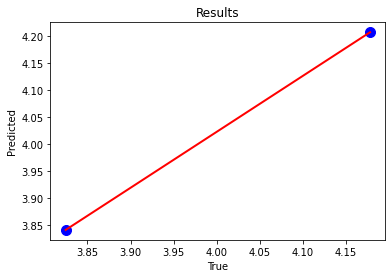

Date	4/24/20
Window	1 days
Train	(183, 92) (183,)
Test	(2, 92) (2,) (2,)

R^2	0.974045
MAE	0.027950
MSE	0.000811
r	1.000000

Austria          over by 1205 people
Australia        over by 355 people



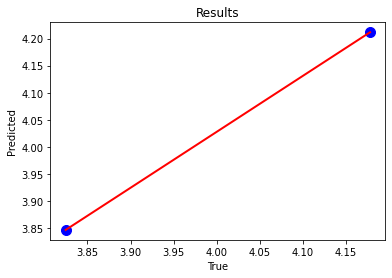

Date	4/24/20
Window	2 days
Train	(183, 91) (183,)
Test	(2, 91) (2,) (2,)

R^2	0.964642
MAE	0.033082
MSE	0.001105
r	1.000000

Austria          over by 1314 people
Australia        over by 476 people



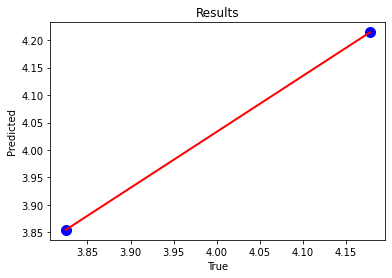

Date	4/24/20
Window	3 days
Train	(183, 90) (183,)
Test	(2, 90) (2,) (2,)

R^2	0.952097
MAE	0.038684
MSE	0.001497
r	1.000000

Austria          over by 1422 people
Australia        over by 614 people



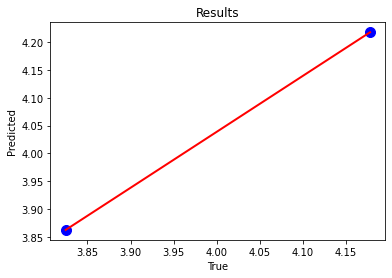

Date	4/24/20
Window	4 days
Train	(183, 89) (183,)
Test	(2, 89) (2,) (2,)

R^2	0.938668
MAE	0.043752
MSE	0.001916
r	1.000000

Austria          over by 1542 people
Australia        over by 733 people



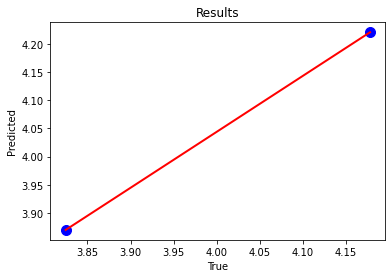

Date	4/24/20
Window	5 days
Train	(183, 88) (183,)
Test	(2, 88) (2,) (2,)

R^2	0.913722
MAE	0.051796
MSE	0.002696
r	1.000000

Austria          over by 1769 people
Australia        over by 908 people



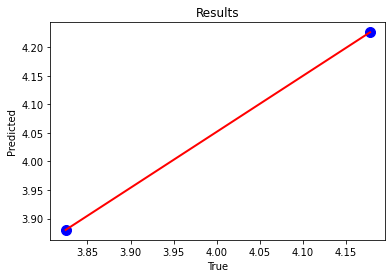

Date	4/24/20
Window	6 days
Train	(183, 87) (183,)
Test	(2, 87) (2,) (2,)

R^2	0.877393
MAE	0.061256
MSE	0.003831
r	1.000000

Austria          over by 1933 people
Australia        over by 1170 people



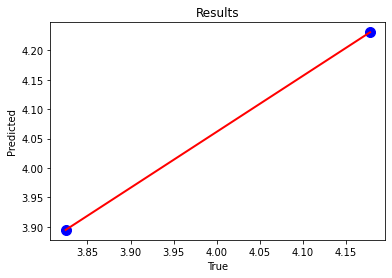

Date	4/24/20
Window	7 days
Train	(183, 86) (183,)
Test	(2, 86) (2,) (2,)

R^2	0.833441
MAE	0.070173
MSE	0.005204
r	1.000000

Austria          over by 1974 people
Australia        over by 1479 people



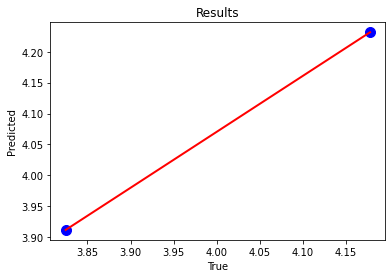

Date	4/24/20
Window	8 days
Train	(183, 85) (183,)
Test	(2, 85) (2,) (2,)

R^2	0.770394
MAE	0.081759
MSE	0.007174
r	1.000000

Austria          over by 2218 people
Australia        over by 1805 people



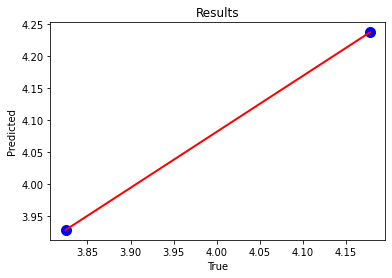

Date	4/24/20
Window	9 days
Train	(183, 84) (183,)
Test	(2, 84) (2,) (2,)

R^2	0.670460
MAE	0.097408
MSE	0.010296
r	1.000000

Austria          over by 2595 people
Australia        over by 2244 people



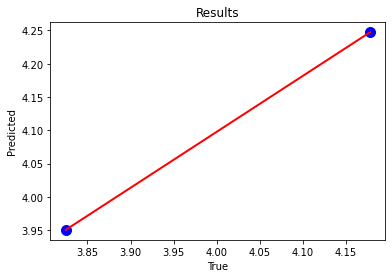

Date	4/24/20
Window	10 days
Train	(183, 83) (183,)
Test	(2, 83) (2,) (2,)

R^2	0.518986
MAE	0.118089
MSE	0.015029
r	1.000000

Austria          over by 3265 people
Australia        over by 2777 people



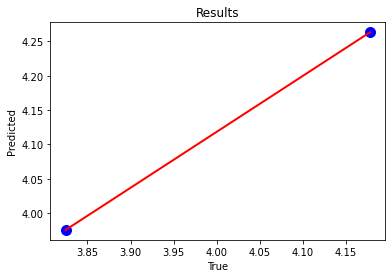

Date	4/24/20
Window	11 days
Train	(183, 82) (183,)
Test	(2, 82) (2,) (2,)

R^2	0.308174
MAE	0.141713
MSE	0.021616
r	1.000000

Austria          over by 4014 people
Australia        over by 3450 people



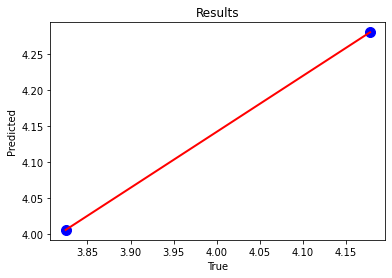

Date	4/24/20
Window	12 days
Train	(183, 81) (183,)
Test	(2, 81) (2,) (2,)

R^2	0.072574
MAE	0.164709
MSE	0.028977
r	1.000000

Austria          over by 4876 people
Australia        over by 4095 people



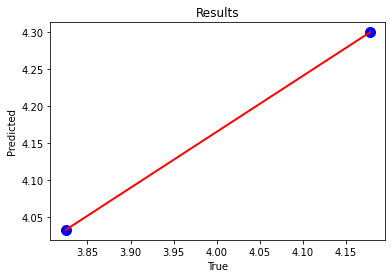

Date	4/24/20
Window	13 days
Train	(183, 80) (183,)
Test	(2, 80) (2,) (2,)

R^2	-0.097425
MAE	0.180381
MSE	0.034289
r	1.000000

Austria          over by 5663 people
Australia        over by 4462 people



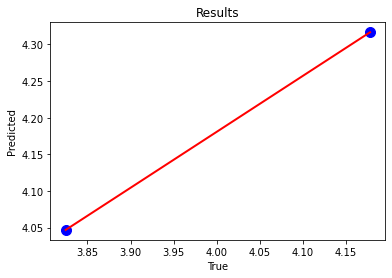

    DEATHS
Date	4/24/20
Window	0 days
Train	(183, 93) (183,)
Test	(2, 93) (2,) (2,)

R^2	0.998830
MAE	0.013108
MSE	0.000198
r	1.000000

Austria          over by 10 people
Australia       under by 3 people



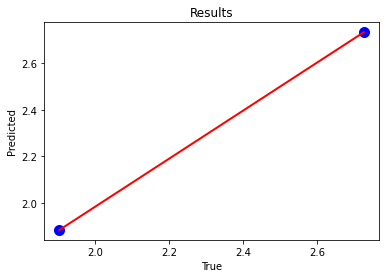

Date	4/24/20
Window	1 days
Train	(183, 92) (183,)
Test	(2, 92) (2,) (2,)

R^2	0.998318
MAE	0.014743
MSE	0.000284
r	1.000000

Austria          over by 8 people
Australia       under by 4 people



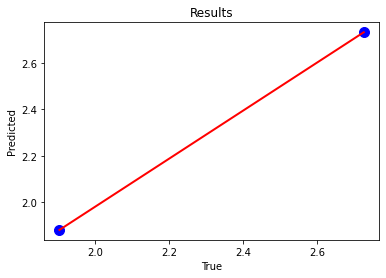

Date	4/24/20
Window	2 days
Train	(183, 91) (183,)
Test	(2, 91) (2,) (2,)

R^2	0.999504
MAE	0.008211
MSE	0.000084
r	1.000000

Austria          over by 5 people
Australia       under by 2 people



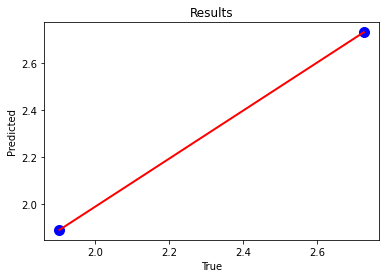

Date	4/24/20
Window	3 days
Train	(183, 90) (183,)
Test	(2, 90) (2,) (2,)

R^2	0.999970
MAE	0.002203
MSE	0.000005
r	1.000000

Austria          over by 2 people
Australia       under by 0 people



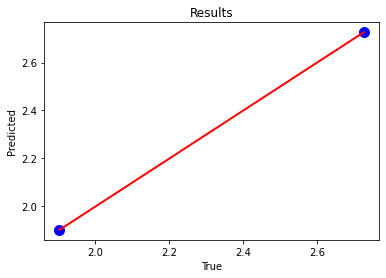

Date	4/24/20
Window	4 days
Train	(183, 89) (183,)
Test	(2, 89) (2,) (2,)

R^2	0.999925
MAE	0.003146
MSE	0.000013
r	1.000000

Austria          over by 2 people
Australia        over by 1 people



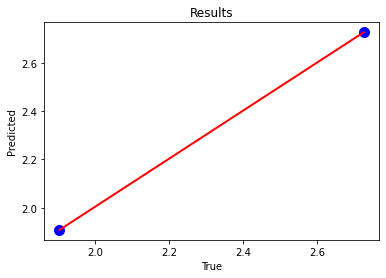

Date	4/24/20
Window	5 days
Train	(183, 88) (183,)
Test	(2, 88) (2,) (2,)

R^2	0.999183
MAE	0.011128
MSE	0.000138
r	1.000000

Austria          over by 9 people
Australia        over by 3 people



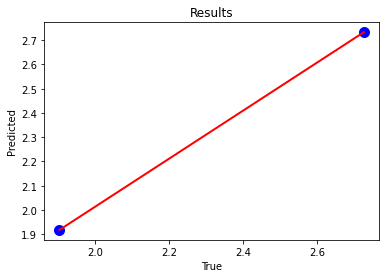

Date	4/24/20
Window	6 days
Train	(183, 87) (183,)
Test	(2, 87) (2,) (2,)

R^2	0.997593
MAE	0.018941
MSE	0.000407
r	1.000000

Austria          over by 15 people
Australia        over by 5 people



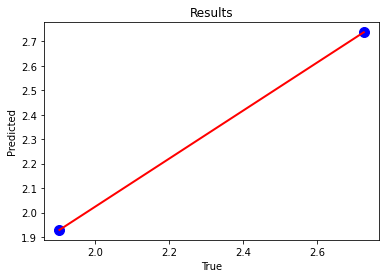

Date	4/24/20
Window	7 days
Train	(183, 86) (183,)
Test	(2, 86) (2,) (2,)

R^2	0.993806
MAE	0.029709
MSE	0.001046
r	1.000000

Austria          over by 21 people
Australia        over by 8 people



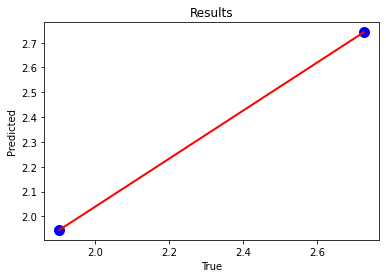

Date	4/24/20
Window	8 days
Train	(183, 85) (183,)
Test	(2, 85) (2,) (2,)

R^2	0.978593
MAE	0.055804
MSE	0.003616
r	1.000000

Austria          over by 42 people
Australia        over by 16 people



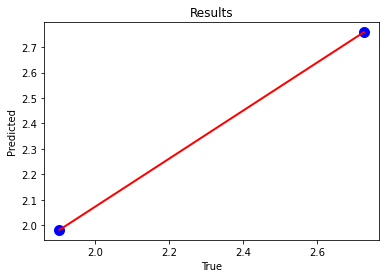

Date	4/24/20
Window	9 days
Train	(183, 84) (183,)
Test	(2, 84) (2,) (2,)

R^2	0.953743
MAE	0.084489
MSE	0.007814
r	1.000000

Austria          over by 77 people
Australia        over by 23 people



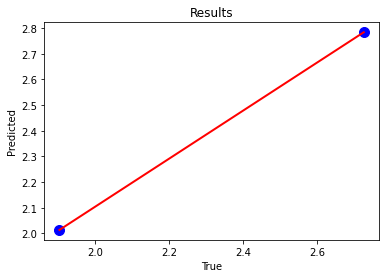

Date	4/24/20
Window	10 days
Train	(183, 83) (183,)
Test	(2, 83) (2,) (2,)

R^2	0.937985
MAE	0.100067
MSE	0.010476
r	1.000000

Austria          over by 105 people
Australia        over by 26 people



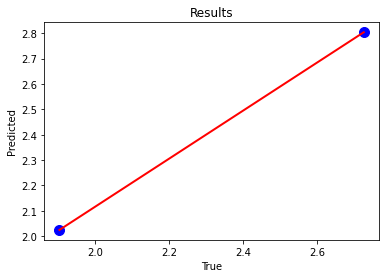

Date	4/24/20
Window	11 days
Train	(183, 82) (183,)
Test	(2, 82) (2,) (2,)

R^2	0.923659
MAE	0.112160
MSE	0.012896
r	1.000000

Austria          over by 129 people
Australia        over by 28 people



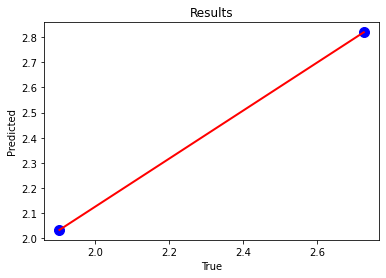

Date	4/24/20
Window	12 days
Train	(183, 81) (183,)
Test	(2, 81) (2,) (2,)

R^2	0.912258
MAE	0.121490
MSE	0.014822
r	1.000000

Austria          over by 159 people
Australia        over by 28 people



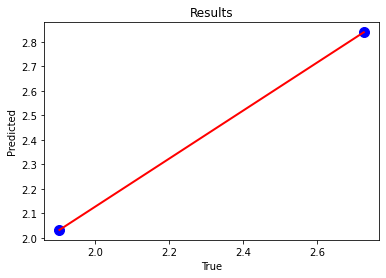

Date	4/24/20
Window	13 days
Train	(183, 80) (183,)
Test	(2, 80) (2,) (2,)

R^2	0.904355
MAE	0.127106
MSE	0.016157
r	1.000000

Austria          over by 179 people
Australia        over by 27 people



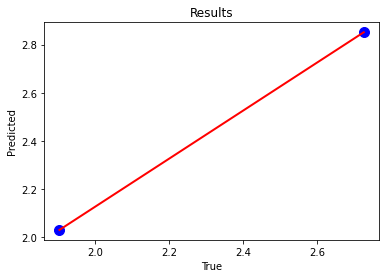

    MISCOUNT CASES
['Austria', 'Australia']
[-1037, -249]
[-1205, -355]
[-1314, -476]
[-1422, -614]
[-1542, -733]
[-1769, -908]
[-1933, -1170]
[-1974, -1479]
[-2218, -1805]
[-2595, -2244]
[-3265, -2777]
[-4014, -3450]
[-4876, -4095]
[-5663, -4462]


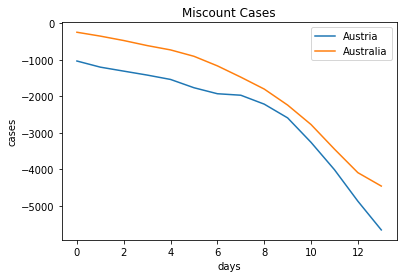

    MISCOUNT DEATHS
['Austria', 'Australia']
[-10, 3]
[-8, 4]
[-5, 2]
[-2, 0]
[-2, -1]
[-9, -3]
[-15, -5]
[-21, -8]
[-42, -16]
[-77, -23]
[-105, -26]
[-129, -28]
[-159, -28]
[-179, -27]


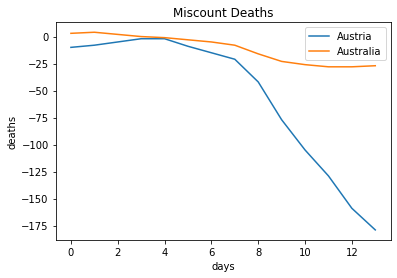

In [98]:
# show me your predictive lookahead
predict_ahead(grading_country_list, df_cases, df_deaths)

***
#### Question 5
Consider our feature space (counts by date) and the nature of the data/problem itself.  Is this a good way to model the problem?  Why or why not?  What might you change? How might your restructure the data?
***

##### Response 5

*Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum*

***
#### Grading Test
***

This following will be used for evaluating your `Lab 2`. You do not need to alter.

    CASES
Date	4/24/20
Window	0 days
Train	(183, 93) (183,)
Test	(2, 93) (2,) (2,)

R^2	0.982587
MAE	0.022404
MSE	0.000544
r	1.000000

Austria          over by 1037 people
Australia        over by 249 people



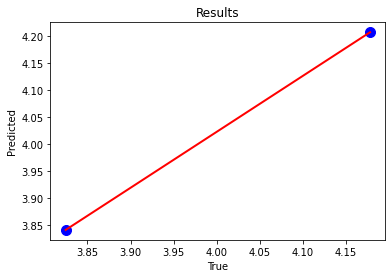

    DEATHS
Date	4/24/20
Window	0 days
Train	(183, 93) (183,)
Test	(2, 93) (2,) (2,)

R^2	0.998830
MAE	0.013108
MSE	0.000198
r	1.000000

Austria          over by 10 people
Australia       under by 3 people



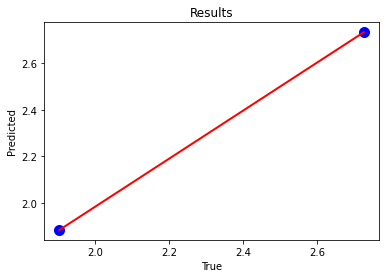

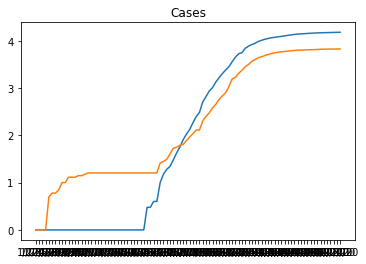

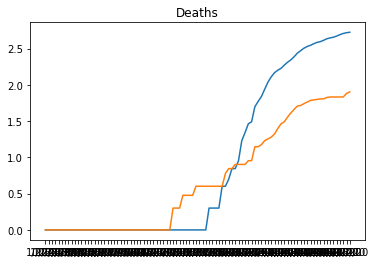

In [30]:
# To grade, I will run this code snippet
#    with different countries and a different num_days
# Your code is expected to work for the most recent date
experiment(grading_country_list, grading_num_days)
print()
graph_countries(log10_transform(df_cases),  grading_country_list, 'Cases')
graph_countries(log10_transform(df_deaths), grading_country_list, 'Deaths')